# Higher Order Single-step Methods 
We shall explore higher order methods that, like Eulers methods, use the last time-step value to compute the value in the new time. Therefore, we can call these methdos *single-step*, but instead they are caled **Runge-Kutta** methods.
$$
 \newcommand{d}{\,{\rm d}}
 \def\vc#1{\mathbf{\boldsymbol{#1}}}     % vector
 \def\tn#1{{\mathbb{#1}}}
 \def\Real{{\rm\bf R}}
 \def\prtl{\partial}
$$

## Derivation of a second-order method
One possibility is to use higher-order Tylor expansions. 
We, however will employ numerical quadrature. We begin with integration
of the initial value problem, assuming the initial time $t_n$ and initial condition $\vc y_n$: 
\begin{equation}
   \vc y(t_n + h) = \vc y_n + \int_{t_n}^{t_n + h} \vc f(t, \vc y(t)) \d t.
\end{equation}

The next point is the approximation of the integral in terms of the numerical quadrature. Here, we will use the simplest approximation by the **midpoint rule**:
$$
    \int_a^b g(t) \d t = (b-a)g\Big(\frac{a+b}{2}\Big) + O(|b-a|^3).
$$
This error estimate holds for functions $g$ with bounded second derivative.

Assuming the right-hand side of ODE satisfies this condition, we can apply the quadrature rule to our initial problem:
$$
    \vc y_{n+1} = \vc y_n + h\vc f(t_n + \frac{h}{2}, \vc y(t_n + \frac{h}{2})) + O(h^3)
$$
Now the question is how to get the half-step solution $\vc y_{n+\frac12} = \vc y(t_n + \frac{h}{2})$?

To approximate this value, we use one step of the explicit Euler method with step $h/2$:
$$
\vc y_{n+\frac12} = \vc y_n + \frac{h}{2}f(t_n, \vc y_n) + O(h^2)
$$
The error would propagate through the $f$ evaluation, to estimate its impact, we use the Lipsitz property of $f$:
$$
\vc f(t_n + \frac{h}{2}, \vc y(t_n + \frac{h}{2})) 
= f(t_n + \frac{h}{2}, \vc y_{n+\frac12}) + L|\vc y(t_n + \frac{h}{2}) - \vc y_{n+\frac12}| 
$$

Combining these two approximation, we get following prescription for computing one step of the method:

\begin{align*}
\vc k_1 &= \vc f(t_n, \vc y_n)\\
\vc k_2 &= \vc f(t_n + \frac{h}{2}, \vc y_n + \frac{h}{2} \vc k_1)\\
\vc y_{n+1} &= y_n + h \vc k_2 
\end{align*}

This method would have a local discretization error of $O(h^3)$, and global error of $O(h^2)$ and would therefore be a second order method named **midpoint rule**.



OK. Are there any other second order methods? Yes, there are infinitely many of them. Inspired by our second order method, let us consider a generic prescription in form:
\begin{align}
    \vc k_1 &= \vc f(t_n, \vc y_n)\\
    \vc k_2 &= \vc f(t_n + ch, \vc y_n + ah\vc k_1)\\
    \vc y_{n+1} &= \vc y_n + h(b_1 \vc k_1 + b_2 \vc k_2),
\end{align}

where $a$, $b_1$, $b_2$, $c$ are so far general real parameters. 

This scheme is called a **two-stage Runge-Kutta method**. 
The "two-stage" refers to the two evaluations of the right-hand side function $f$.

To determine the parameters of the scheme and also to prove the order of the local discretization error, we basically plug-in the exact solution into the RK formulas
and compare it to the second-order Taylor expansion in point $(t_n, \vc y_n)$.



The Taylor expansion of the function $\vc f$ at the point $(t, \vc y)$ has the form:
$$    
    \vc f(t + \tau, \vc y + \vc \xi) = \vc f(t,\vc y) + \tau \prtl_t \vc f(t,\vc y) + \prtl_{\vc y} \vc f(t, \vc y) \cdot \vc \xi  
     + O(\tau |\vc \xi|) + O(\tau^2) + O(|\vc \xi|^2)
$$


Now, we use this expansion in $\vc k_2$, substituting $t = t_n$, $\vc y = \vc y_n$, $\tau = hc$, $\vc \xi = ha \vc f(t_n, \vc y_n)$
$$
    \vc k_2 = \big[f + hc\prtl_t f + (\prtl_{\vc y} \vc f) \cdot (ha\vc f)\big](t_n, \vc y_n) + O(h^2).
$$
Since both $\tau$ and $\vc \xi$ contain $h$, we simplified all three error Taylor expansions to just $O(h^2)$.
We now use the last line of the two-stage RK scheme
and plug in the exact solution:
$$
  \vc y(t_n + h) = \vc y_n + h\left[ b_1 \vc f + b_2 \vc f + b_2 hc\prtl_t f + b_2ha(\prtl_{\vc y} \vc f) \vc f \right](t_n, \vc y_n) + O(h^3)
$$

We shall compare this approximation with the second-order Taylor expansion of the solution:
$$
  \vc y(t_n + h) = \vc y_n + h\dot{\vc y}(t_n)+ \frac{h^2}{2} \ddot{\vc y}(t_n) + O(h^3)
$$
To this end, we substitute
$$
  \dot{\vc y} = \vc f(t, \vc y).
$$
We obtain second derivative, by differentiation of the ODE:
$$
\ddot{\vc y} = 
\prtl_t \vc f(t, \vc y(t)) + \prtl_{\vc y} \vc f(t, \vc y(t)) \dot{\vc y}(t) =
\left[ \prtl_t \vc f + (\prtl_{\vc y} \vc f) \vc f \right] (t, \vc y(t)).
$$

Finally, the second-order Tylor expansion is:
\begin{equation}
  \vc y(t_n + h) = \vc y_n + 
  h\left[\vc f + \frac{h}{2}(\prtl_t \vc f + (\prtl_{\vc y} \vc f) \vc f)\right](t_n, \vc y_n) + O(h^3)  
\end{equation}

From here we get the following equations for the parameters of the scheme:
$$
   b_1 + b_2 = 1,\quad b_2 a = b_2 c = \frac12
$$

The three equations for the four parameters provide one free parameter, giving us a whole class of second-order methods.


1. For the choice $b_1 =0$, $b_2 =1$, $a=c=\frac12$ we get the method we have derived which we call: **explicit midpoint method**.

2. For the choice $b_1 = b_2 = \frac12$, $a=c=1$ we get the method:
\begin{align*}    
    \vc k_1 &= \vc f(t_n, \vc y_n)\\
    \vc k_2 &= \vc f(t_n + h, \vc y_n + h \vc k_1)\\
    {\vc y}_{n+1} &= y_n + \frac{h}{2}(\vc k_1 + \vc k_2).
\end{align*}
 You can find it under the name: **Heun's method**. 


## General Runge-Kutta methods
The general $s$-stage Runge-Kutta method uses $s$ evaluations of the function $\vc f$. General formula is:
$$
  \vc y_{n+1} = \vc y_n + h\sum_{i=1}^s b_i \vc k_i,
$$
where
$$
  \vc k_i = \vc f(t_n+ hc_i, \vc y_n + h\alpha_i),\quad \alpha_i = \sum_{j=1}^s a_{ij} k_j
$$
The parameters of Runge-Kutta methods are usually written in the form of so-called Butcher tables:


Parametry Runge-Kuttových metod se obvykle zapisují ve formě takzvaných Butcherových tabulek:
\begin{equation}
    \begin{array}{c|cccc}
        c_1 & a_{11} & a_{12} & \dots & a_{1s} \\
        c_2 & a_{21} & a_{22} & \dots & a_{2s} \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        c_s & a_{s1} & a_{s2} & \dots & a_{ss} \\
        \hline
             & b_{1} & b_{2} & \dots & b_{s} \\
    \end{array}
\end{equation}
or in a matrix form:
\begin{equation}
    \begin{array}{c|c}
        \vc c & \tn A\\
              & \vc b 
    \end{array}
\end{equation}

Thus, the aforementioned methods can be written using Butcher tables as follows:

**Explicit Euler method**:
\begin{equation}
    \begin{array}{l|l}
        0 & 0  \\
        \hline
             & 1 \\
    \end{array}
\end{equation}

**Implicit Euler method**:
\begin{equation}
    \begin{array}{l|l}
        1 & 1  \\
        \hline
             & 1 \\
    \end{array}
\end{equation}

**Explicit Midpoint Method**:
\begin{equation}
    \begin{array}{l|ll}
        0 & 0 & 0  \\
        1/2 & 1/2 & 0  \\
        \hline
             & 0 & 1 \\
    \end{array}
\end{equation}

**Heun's metoda**:
\begin{equation}
    \begin{array}{l|ll}
        0 & 0 & 0  \\
        1 & 1 & 0  \\
        \hline
             & 1/2 & 1/2 \\
    \end{array}
\end{equation}








## Explicit RK Methods

The matrix $\tn A$ has non-zero values only below the diagonal for explicit methods. Other methods are implicit.

Example of an explicit three-stage method of third order (also known as Heun's method):
\begin{equation}
    \begin{array}{l|lll}
        0 &  &  &  \\
        1/3 & 1/3 &  &  \\
        2/3 & 0 & 2/3 &  \\
        \hline
             & 1/4 & 0 & 3/4 \\
    \end{array}
\end{equation}


Example of an explicit four-stage method of the fourth order (standard RK method):
\begin{equation}
    \begin{array}{c|cccc}
        0 &  &  &  & \\
        1/2 & 1/2 &  &  & \\
        1/2 & 0 & 1/2 &  & \\
        1 & 0 & 0 & 1 & \\
        \hline
             & 1/6 & 2/6 & 2/6 & 1/6 \\
    \end{array}    
\end{equation}
The advantage of this method is the additional zero values in the table, resulting in a smaller number of operations, which is significant only for simple functions $\vc f$.
Another popular explicit method of the fourth order is the so-called three-eighths rule:
\begin{equation}
    \begin{array}{c|cccc}
        0 &  &  &  & \\
        1/3 & 1/3 &  &  & \\
        2/3 & -1/3 & 1 &  & \\
        1 & 1 & -1 & 1 & \\
        \hline
             & 1/8 & 3/8 & 3/8 & 1/8 \\
    \end{array}    
\end{equation}
The advantage of this method is a smaller constant in the error term compared to the standard RK method.

From the given examples, one might conclude that every $s$-stage method has order $s$. Unfortunately, this is only true for $s \le 4$.
Every fifth-order method is at least six-stage. For this reason, fourth-order methods are most commonly used.

Minimum number of stages $s$ of an explicit RK method required to achieve a given order $p$:

<table style="border-collapse: collapse;font-size: 14px;">
    <tr>
        <th style="border-right: 1px solid black;">p</th>
        <td>1</td>
        <td>2</td>
        <td>3</td>
        <td>4</td>
        <td>5</td>
        <td>6</td>
        <td>7</td>
        <td>8</td>
    </tr>
    <tr style="border-top: 1px solid black;">
        <th style="border-right: 1px solid black;">min s</th>
        <td>1</td>
        <td>2</td>
        <td>3</td>
        <td>4</td>
        <td>6</td>
        <td>7</td>
        <td>9</td>
        <td>11</td>
    </tr>
</table>





Another important question is the stability of the methods. It can be proven that for a fixed $s \le 4$, all $s$-stage RK methods of order $s$
have the same region of absolute stability, see following Figure. No explicit method is unconditionally absolutely stable.

All explicit methods have quite restrictive regions of absolute stability. 
The following figure depicts the region of absolute stability for several $p$-stage RK methods of order $p$.
<p align="center">
    <img src="as_rk.png" 
    alt="region of absolute stability - explicit RK methods" 
    style="width:400px;"/>
</p>




## Implicit RK methods

Let's derive a single-stage implicit method of the highest possible order. 
Generally, the method is prescribed as:

\begin{align*}
   \vc y_{n+1} &= \vc y_{n} + h b_1 \vc k_1\\
   \vc k_1     &= \vc f (t_n + c_1 h, \vc y_n + ha_{11} \vc k_1 )
\end{align*}

For $k_1$, we use the Taylor expansion:
$$
 \vc k_1 = \vc f + c_1 h \prtl_t \vc f + h a_{11} \vc k_1 \prtl_{\vc y}\vc f + O(h^2)
$$

then on the right side, we again use the expansion for $\vc k_1 = \vc f + O(h)$:
$$
 \vc k_1 = \vc f + c_1 h \prtl_t \vc f + h a_{11} \vc f (\prtl_{\vc y}\vc f) + O(h^2).
$$
Now we substitute into the general formula of the method:
$$
\vc y_{n+1} = \vc y_n + b_1 h\vc f + (b_1c_1) h^2\prtl_t \vc f + (b_1a_{11})h^2\vc f(\prtl_{\vc y} \vc f) + O(h^3)
$$
and compare with the Taylor expansion of the exact solution, 
for the method parameters, we get:
$$
    b_1=1,\quad b_1 c_1 = 1/2,\quad b_1 a_{11} = 1/2.
$$
And thus the second-order implicit scheme of highest order is:

\begin{equation}
    \begin{array}{l|l}
        1/2 & 1/2  \\
        \hline
             & 1 \\
    \end{array}
\end{equation}

called the 'implicit midpoint rule'. It is a second order method $p=2$. 

Just for curiosity, the two-stage implicit method of the highest order is of order $4$ (Hammer, Hollingsworth method)
and has the Butcher's table:

\begin{equation}
    %\arraycolsep=8pt\def\arraystretch{1.5}
    \begin{array}{l|ll}
        \frac12 -\frac{\sqrt3}{6} & \frac14 & \frac14-\frac{\sqrt3}{6}  \\
        \frac12 +\frac{\sqrt3}{6} & \frac14+\frac{\sqrt3}{6} & \frac14  \\
        \hline
             & \frac12 & \frac12\\
    \end{array}
\end{equation}

Let's calculate the region of absolute stability for the implicit midpoint method. Applying the method to a test linear equation, we get:
$$
    y_{n+1} = y_n + hk_1,\quad k_1 = \lambda y_n + \frac{h\lambda}{2} k_1
$$
$$
k_1 = \frac{\lambda }{1 - h\lambda/2} y_n,\quad y_{n+1} = \frac{ 1 + \lambda h/2}{1- \lambda h/2} y_n
$$
The region of absolute stability is inside the curve given by the equation:
$$
    \frac{ 1 + z/2}{1- z/2} = e^{i\theta},\quad z = h\lambda
$$
Express $z$:
$$
    z = 2\frac{1 - e^{i\theta}}{1 + e^{i\theta}} = -2 i \tan ( \theta/2 )
$$
which means that the boundary of the region of absolute stability is the imaginary axis, and the region of absolute stability is the negative half-plane of the complex plane $ {\rm Re} h\lambda \le 0 $.




## Example Problem - Bouncing Ball

The ball with radius $R$ is in air if its height is $y(t) > R$. When in air, 
the ball is affected only by gravity force, negative, downwards, and follows the second Newton's law :
$$ 
 y''(t) = -g \text{ for } y(t) > R
$$
Here, $g\sim 10$ is gravity acceleration.

When in contact with surface $y(t)<R$, we model its elasticity by the simplest linear model:
$$ 
y''(t) = k(R - y(t)) \text{ pro } y(t) < R
$$
The elastic coefficient $k$ is assumed to by high, so that $g$ could be neglected with respect to $k/R$.

We convert the second order ODE to the system:



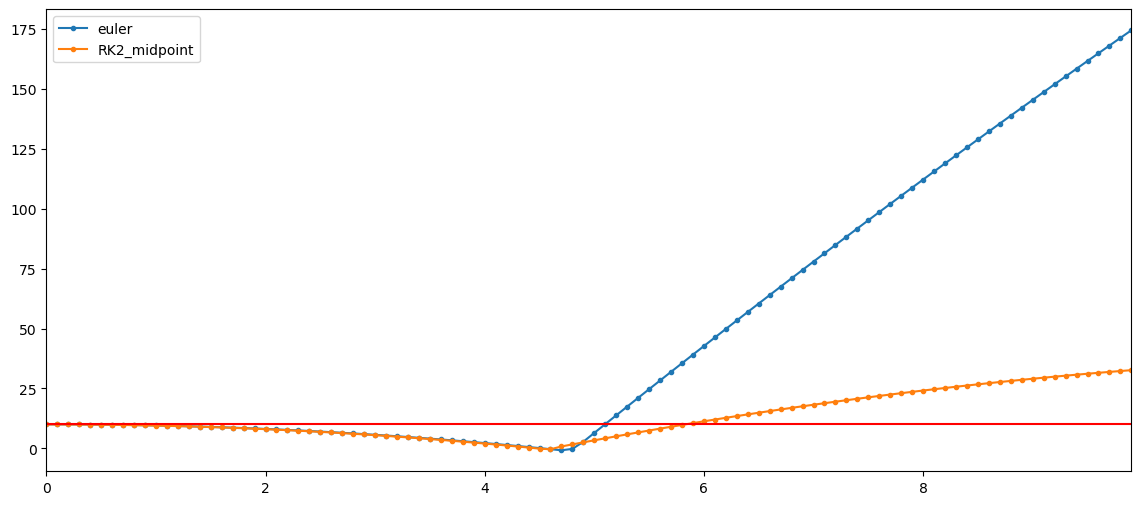

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
# Bouncing ball, with spring bounce


def ode_func(t, y):
    heigh, velocity = y
    force = -1
    stiffness = 300
    if heigh < 0:
        # check for bounce
        # use a spring bounce, not the instant bounce
        force += stiffness * abs(heigh)
    dy = [velocity, force]
    return dy

t0 = 0
y0 = [10, 0]


def plot_jumps(method1, method2):
    fig,ax = plt.subplots(1, 1, figsize=(14,6))
    for m in [method1, method2]:
        name, t, y = m
        marker = '.' if len(t) < 150 else None
        ax.plot(t, y[0, :], marker=marker, label=name)
        ax.set_xlim([0,t[-1]])
    ax.legend()
    max_y = y0[0] * np.ones_like(t)
    ax.plot(t, max_y, c='r')
    plt.show()

def compare(m1, s1, m2, s2, t_end=100):
    t, v = m1(ode_func, (t0, t_end), y0, s1)
    data1 = m1.__name__, t, v
    t, v = m2(ode_func, (t0, t_end), y0, s2)
    data2 = m2.__name__, t, v
    plot_jumps(data1, data2)
    
def euler(func, domain, y0, step):
    times = np.arange(*domain, step)
    values = []
    values.append(y0) 
    y = y0
    for i, t in enumerate(times[1:]):
        f1, f2 = func(t, y)
        y = (y[0] + step * f1, y[1] + step * f2)
        values.append(y)
    return times, np.array(values).T


def RK2_midpoint(func, domain, y0, step):
    """
    Implements the RK2 (Midpoint) method.

    Parameters:
    - func: The function defining the system of ODEs, takes (t, y) as arguments.
    - domain: Tuple (start, end) defining the time interval.
    - y0: Initial condition as a tuple or list.
    - step: Time step for the integration.

    Returns:
    - times: Array of time points.
    - values: Array of solution values at each time point, transposed for easy plotting.
    """
    times = np.arange(*domain, step)
    values = []
    values.append(y0)
    y = np.array(y0, dtype=float)

    for t in times[:-1]:
        k1 = np.array(func(t, y))
        k2 = np.array(func(t + step / 2, y + step / 2 * k1))
        y = y + step * k2
        values.append(y)

    return times, np.array(values).T

compare(euler, 0.1, RK2_midpoint, 0.1, 10)


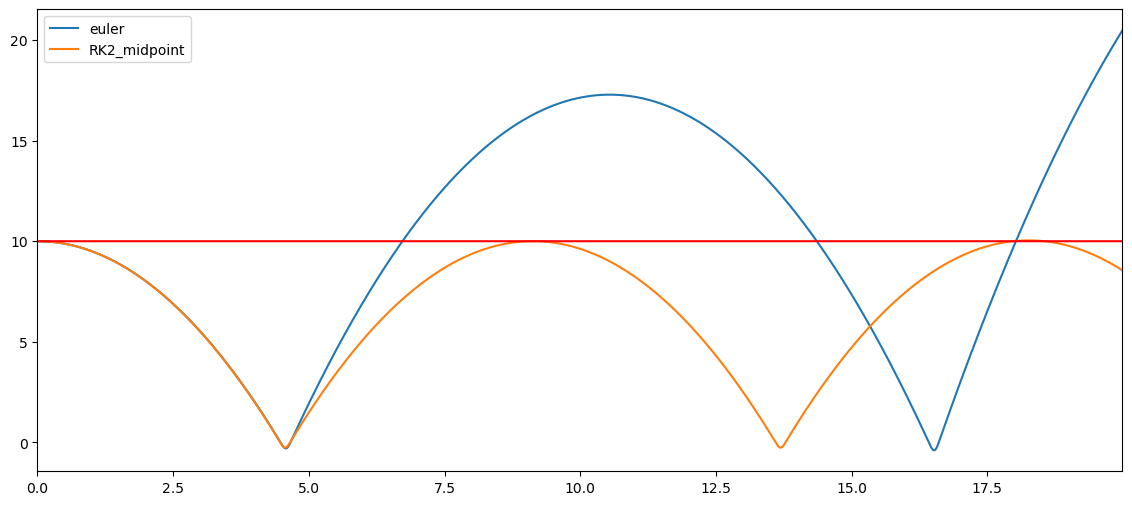

In [84]:
compare(euler, 0.01, RK2_midpoint, 0.01, 20)

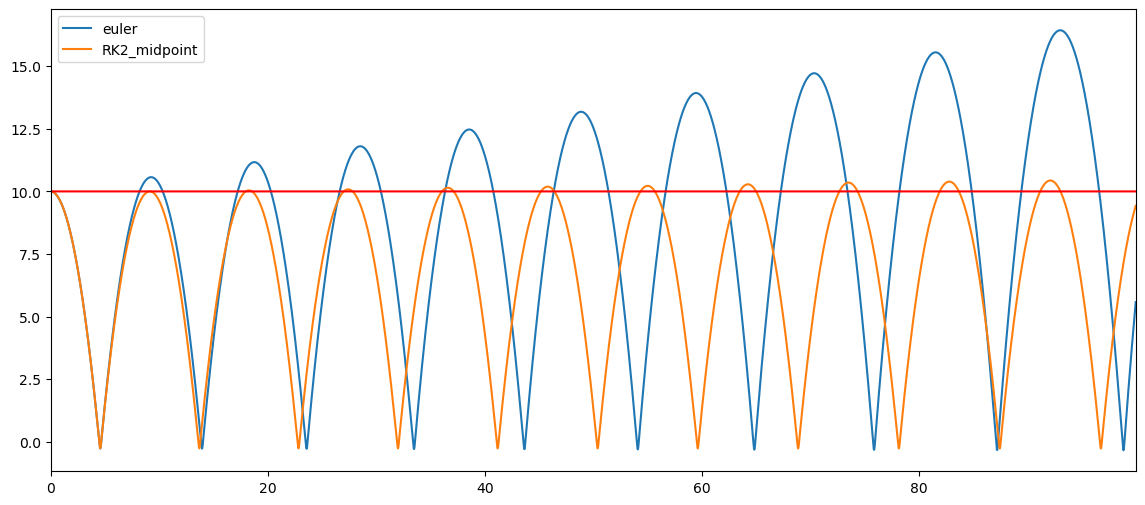

In [85]:
compare(euler, 0.001, RK2_midpoint, 0.01, 100)

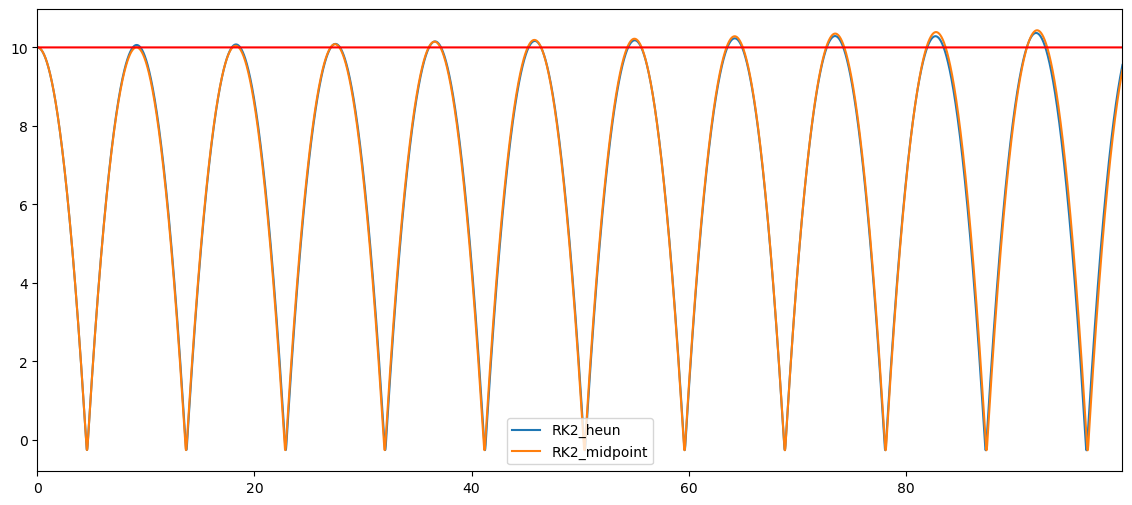

In [86]:

def RK2_heun(func, domain, y0, step):
    """
    Implements Heun's Method (Improved Euler, RK2).

    Parameters:
    - func: The function defining the system of ODEs, takes (t, y) as arguments.
    - domain: Tuple (start, end) defining the time interval.
    - y0: Initial condition as a tuple or list.
    - step: Time step for the integration.

    Returns:
    - times: Array of time points.
    - values: Array of solution values at each time point, transposed for easy plotting.
    """
    times = np.arange(*domain, step)
    values = []
    values.append(y0)
    y = np.array(y0, dtype=float)

    for t in times[:-1]:
        k1 = np.array(func(t, y))
        y_predictor = y + step * k1  # Predictor step
        k2 = np.array(func(t + step, y_predictor))  # Corrector step
        y = y + (step / 2) * (k1 + k2)  # Average of slopes
        values.append(y)

    return times, np.array(values).T


compare(RK2_heun, 0.01, RK2_midpoint, 0.01, 100)



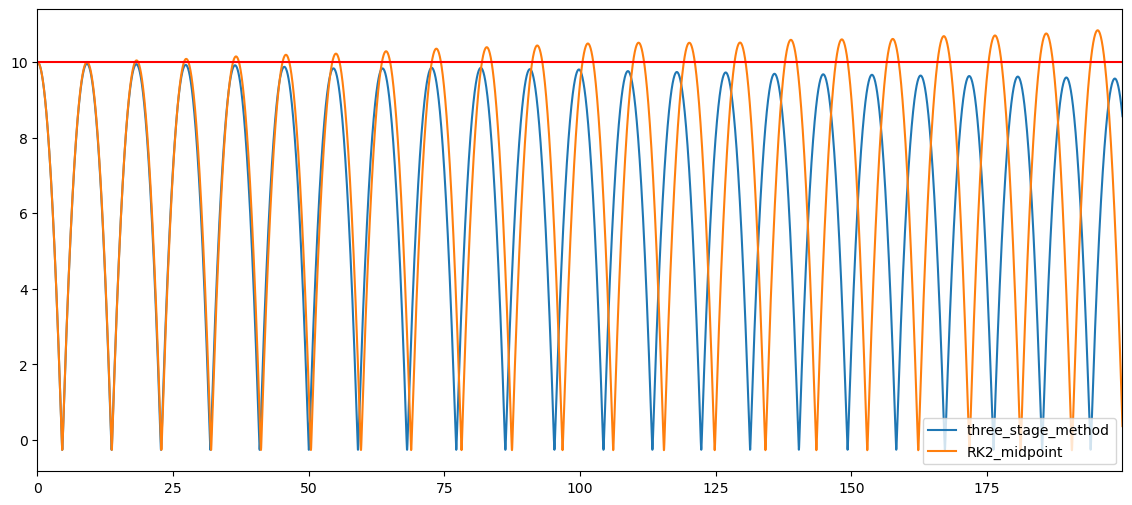

In [89]:
def three_stage_method(func, domain, y0, step):
    """
    Implements a 3-stage Runge-Kutta method.

    Parameters:
    - func: The function defining the system of ODEs, takes (t, y) as arguments.
    - domain: Tuple (start, end) defining the time interval.
    - y0: Initial condition as a tuple or list.
    - step: Time step for the integration.

    Returns:
    - times: Array of time points.
    - values: Array of solution values at each time point, transposed for easy plotting.
    """
    times = np.arange(*domain, step)
    values = []
    values.append(y0)
    y = np.array(y0, dtype=float)

    for t in times[:-1]:
        k1 = np.array(func(t, y))
        k2 = np.array(func(t + step / 2, y + step / 2 * k1))
        k3 = np.array(func(t + step, y - step * k1 + 2 * step * k2))
        y = y + (step / 6) * (k1 + 4 * k2 + k3)
        values.append(y)

    return times, np.array(values).T

compare(three_stage_method, 0.01, RK2_midpoint, 0.01, 200)


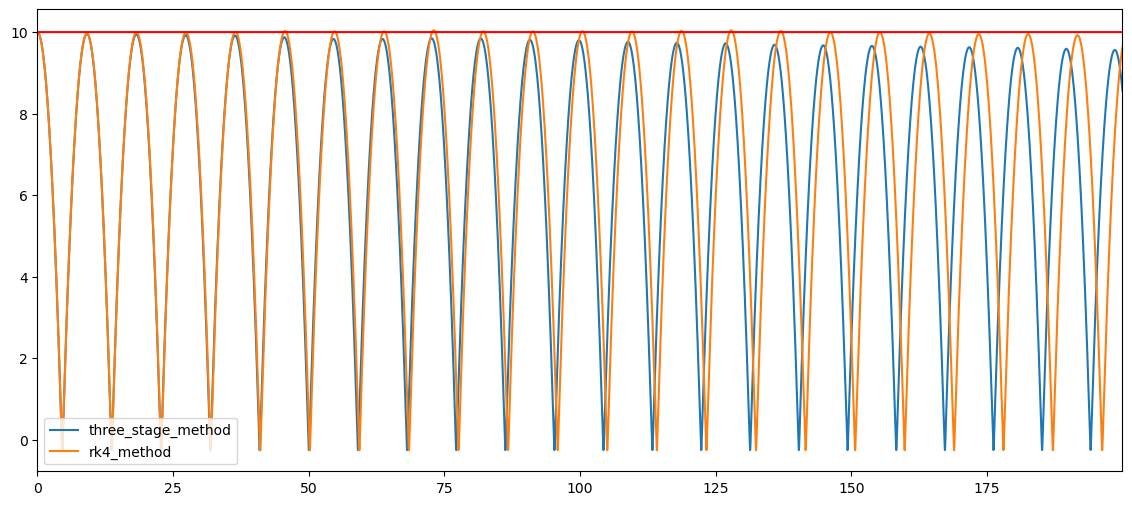

In [117]:
import numpy as np

def rk4_method(func, domain, y0, step):
    """
    Implements the standard RK4 (4th-order Runge-Kutta) method.

    Parameters:
    - func: The function defining the system of ODEs, takes (t, y) as arguments.
    - domain: Tuple (start, end) defining the time interval.
    - y0: Initial condition as a tuple or list.
    - step: Time step for the integration.

    Returns:
    - times: Array of time points.
    - values: Array of solution values at each time point, transposed for easy plotting.
    """
    times = np.arange(*domain, step)
    values = []
    values.append(y0)
    y = np.array(y0, dtype=float)

    for t in times[:-1]:
        k1 = np.array(func(t, y))
        k2 = np.array(func(t + step / 2, y + step / 2 * k1))
        k3 = np.array(func(t + step / 2, y + step / 2 * k2))
        k4 = np.array(func(t + step, y + step * k3))
        y = y + (step / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        values.append(y)

    return times, np.array(values).T

# The RK4 method is ready to use for solving systems of ODEs. Let me know if you'd like to test it!

compare(three_stage_method, 0.01, rk4_method, 0.01, 200)


### Adaptive methods
**RK23**: Explicit Runge-Kutta method of order 3(2) [3]. The error is controlled assuming accuracy of the second-order method, but steps are taken using the third-order accurate formula (local extrapolation is done). A cubic Hermite polynomial is used for the dense output. Can be applied in the complex domain.

**RK45** (default): Explicit Runge-Kutta method of order 5(4) [1]. The error is controlled assuming accuracy of the fourth-order method, but steps are taken using the fifth-order accurate formula (local extrapolation is done). A quartic interpolation polynomial is used for the dense output [2]. Can be applied in the complex domain.

**DOP853**: Explicit Runge-Kutta method of order 8 [13]. Python implementation of the “DOP853” algorithm originally written in Fortran [14]. A 7-th order interpolation polynomial accurate to 7-th order is used for the dense output. Can be applied in the complex domain.

**Radau**: Implicit Runge-Kutta method of the Radau IIA family of order 5 [4]. The error is controlled with a third-order accurate embedded formula. A cubic polynomial which satisfies the collocation conditions is used for the dense output.




RK23


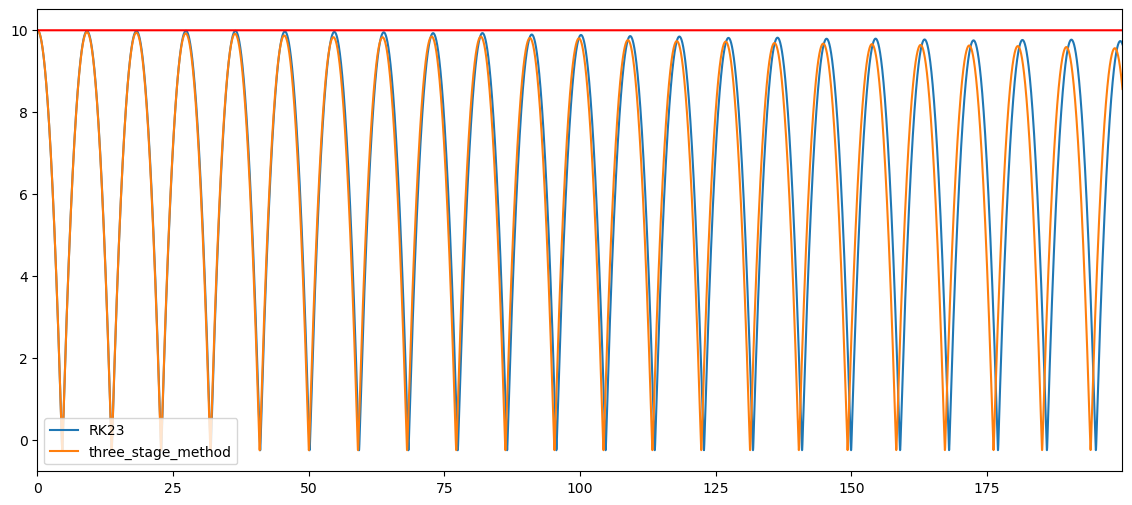

In [127]:
import sys
import types


def ivp_method(func, domain, y0, step, method):
    print(method)
    result = integrate.solve_ivp(ode_func, domain, y0, method = method, max_step=step)
    return result.t, result.y

def ivp(m):
    def func(*args):
        return ivp_method(*args, method=m)
    func.__name__ = m
    return func
    
compare(ivp('RK23'), 0.01, three_stage_method, 0.01, 200)


RK45


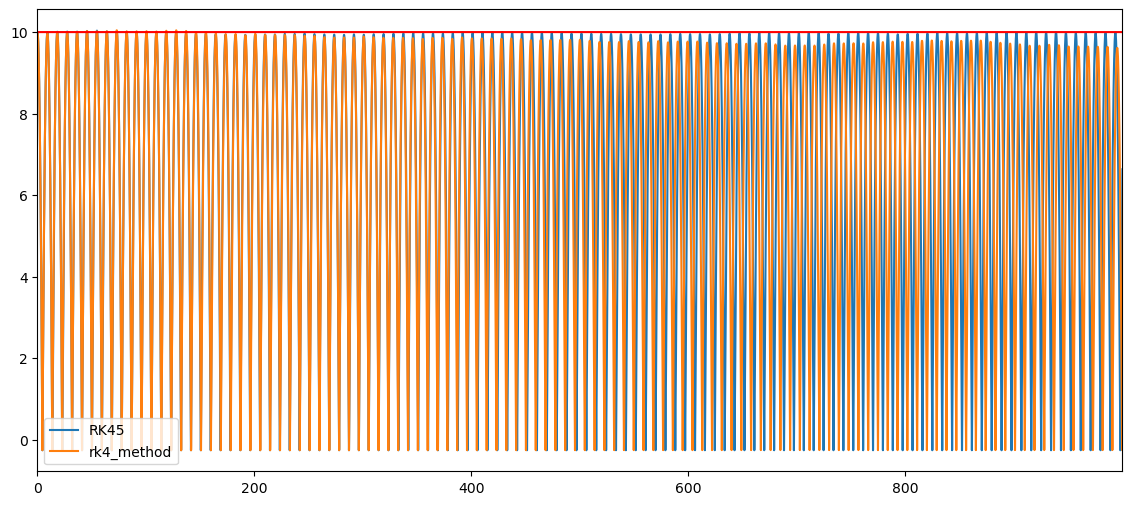

In [113]:
compare(ivp('RK45'), 0.01, rk4_method, 0.01, 1000)


DOP853
RK45


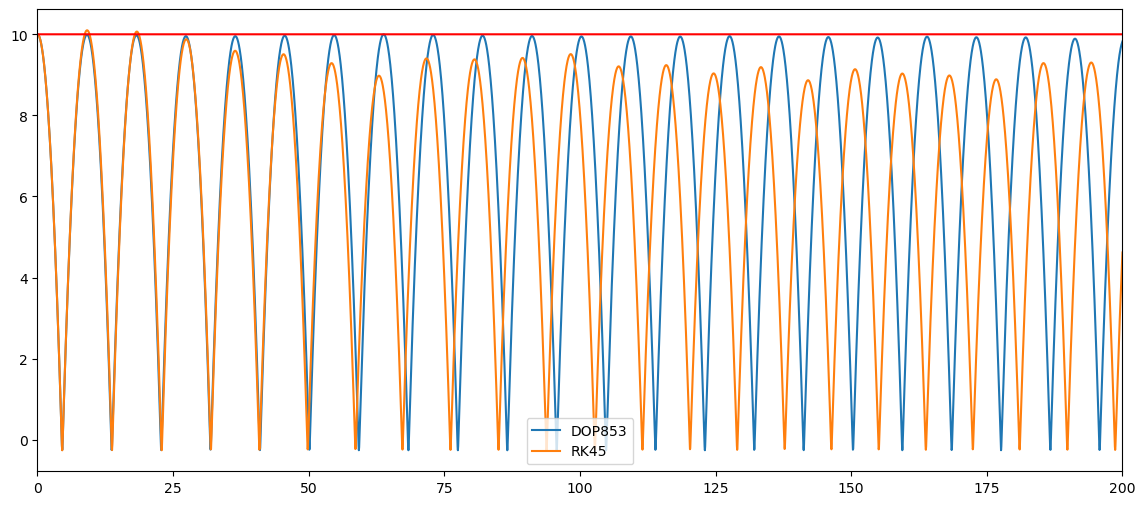

In [128]:
compare(ivp('DOP853'), 0.05, ivp('RK45'), 0.05, 200)


DOP853
Radau


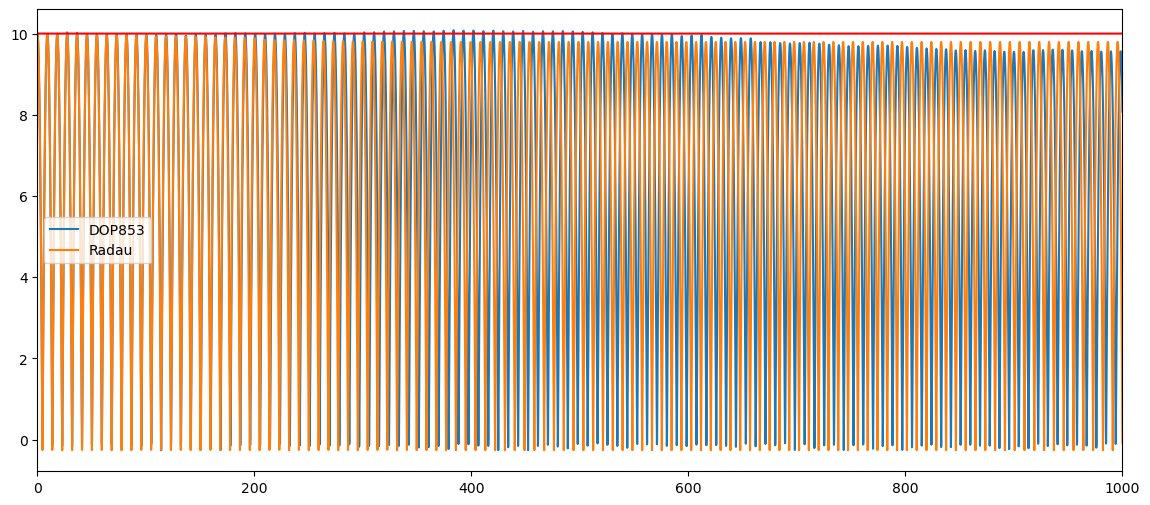

In [129]:
compare(ivp('DOP853'), 0.2, ivp('Radau'), 0.2, 1000)


DOP853
Radau


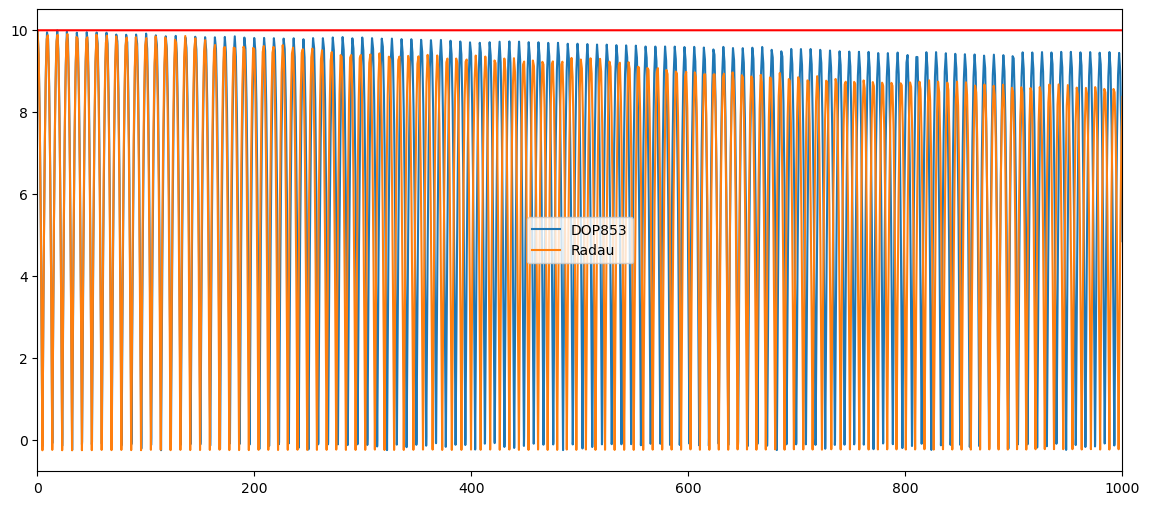

In [124]:
# High order adaptivity not fast enough to respond to discontinuous force.

compare(ivp('DOP853'), 1, ivp('Radau'), 1, 1000)


# Multistep Methods


## Tests
**LSODA**: Adams/BDF method with automatic stiffness detection and switching [7], [8]. This is a wrapper of the Fortran solver from ODEPACK.

**BDF**: Implicit multi-step variable-order (1 to 5) method based on a backward differentiation formula for the derivative approximation [5]. The implementation follows the one described in [6]. A quasi-constant step scheme is used and accuracy is enhanced using the NDF modification. Can be applied in the complex domain.

